## Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib as mpl

In [16]:
# Download the Data sets and put them in the same directory as your jupyter notebook
desc_fname = 'OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls'
data_fname = 'Incidents_Responded_to_by_Fire_Companies.csv'
census_fname = 'https://s3.amazonaws.com/SplitwiseBlogJB/2010+Census+Population+By+Zipcode+(ZCTA).csv'

In [17]:
df_desc = pd.read_excel(desc_fname)
for i, row in df_desc.iterrows():
    print(row['Column Name'])
    print(row['Description'])
    print('-----------------------------------------')

IM_INCIDENT_KEY
Unique identifier for each incident which serves as the Primary Key
-----------------------------------------
FIRE_BOX
Identifier for the Fire Alarm Box area in which the incident took place - unique per borough
-----------------------------------------
INCIDENT_TYPE_DESC
The code and description of the incident category type
-----------------------------------------
INCIDENT_DATE_TIME
The date and time that the incident was logged into the Computer Aided Dispatch system
-----------------------------------------
ARRIVAL_DATE_TIME
The date and time that the first unit arrived on scene
-----------------------------------------
UNITS_ONSCENE
Total number of units that arrived on scene
-----------------------------------------
LAST_UNIT_CLEARED_DATETIME
The date and time that the incident was completed and the last unit cleared the scene
-----------------------------------------
HIGHEST_LEVEL_DESC
The highest alarm level that the incident received
--------------------------

In [18]:
df_census = pd.read_csv(census_fname)
df_census.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [19]:
date_columns = ['INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME', 'LAST_UNIT_CLEARED_DATE_TIME']
data_type = {'ZIP_CODE':int}
df_data = pd.read_csv(data_fname)
df_data.head()

/Users/israeldiego/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,63476768,2928,"746 - Carbon monoxide detector activation, no CO",06/30/2018 11:55:29 PM,07/01/2018 12:00:32 AM,2.0,07/01/2018 12:22:57 AM,11 - First Alarm,1648.0,"42 - HazMat detection, monitoring, sampling, &...",...,10453,2 - Bronx,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,63476763,1021,"300 - Rescue, EMS incident, other",06/30/2018 11:54:44 PM,06/30/2018 11:58:59 PM,1.0,07/01/2018 12:09:29 AM,11 - First Alarm,885.0,"00 - Action taken, other",...,11203,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63476761,2745,"651 - Smoke scare, odor of smoke",06/30/2018 11:54:13 PM,06/30/2018 11:58:29 PM,3.0,07/01/2018 12:07:50 AM,11 - First Alarm,817.0,"00 - Action taken, other",...,10456,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63476762,2135,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,10454,2 - Bronx,basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63476759,1877,"710 - Malicious, mischievous false call, other",06/30/2018 11:53:33 PM,06/30/2018 11:56:50 PM,1.0,06/30/2018 11:57:11 PM,11 - First Alarm,218.0,"00 - Action taken, other",...,11208,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def zipcode(x):
    """
    change zip code from float to int
    """
    try:
        y = int(x)
    except ValueError:
        if type(x) == str:
            y = int(x.split('-')[0])
        elif math.isnan(x):
            y = 0
        
    return y 

df_data['ZIP_CODE'] = df_data['ZIP_CODE'].apply(lambda x: zipcode(x))

In [21]:
df_data['INCIDENT_TYPE_CODE'] = df_data['INCIDENT_TYPE_DESC'].apply(lambda x: x.split(' - ')[0])

# Most common incident

In [22]:
incidents = pd.DataFrame(df_data.groupby('INCIDENT_TYPE_DESC')['INCIDENT_TYPE_DESC'].size())

In [23]:
incidents['incident_ratio'] = incidents['INCIDENT_TYPE_DESC']/len(df_data)

In [24]:
most_common_incident = incidents.sort_values('incident_ratio').incident_ratio.iloc[-1]

In [25]:
most_common_incident

0.35988610259500914

# False calls in Staten Island vs Manhatan

In [26]:
df_false = df_data[df_data['INCIDENT_TYPE_CODE'] == '710']   

In [27]:
df_false_dest = pd.DataFrame(df_false.groupby('BOROUGH_DESC').size())

In [28]:
manhattan = df_false_dest[df_false_dest.index == '1 - Manhattan'].values[0][0]
staten = df_false_dest[df_false_dest.index =='3 - Staten Island'].values[0][0]

In [29]:
staten/manhattan

0.32626764908714745

# Cooking fire hour

In [ ]:
df_cooking = df_data[['INCIDENT_TYPE_DESC', 'INCIDENT_TYPE_CODE', 'INCIDENT_DATE_TIME']]
df_cooking['Hour'] = pd.to_datetime(df_cooking['INCIDENT_DATE_TIME']).dt.hour

In [ ]:
hour_count = df_cooking.groupby('Hour')['INCIDENT_TYPE_CODE'].count()
cooking_count = df_cooking[df_cooking.INCIDENT_TYPE_CODE == '113'].groupby('Hour')['INCIDENT_TYPE_CODE'].count()

In [182]:
cooking_proba = pd.DataFrame(cooking_count/hour_count)
cooking_proba.max()[0]

0.050846824501505385

# Average number of units 111 vs 651

In [ ]:
df_111_651 = df_data[df_data.INCIDENT_TYPE_CODE.isin(['111', '651'])]

In [ ]:
units_111 = df_111_651.groupby('INCIDENT_TYPE_CODE')['UNITS_ONSCENE'].mean()['111']
units_651 = df_111_651.groupby('INCIDENT_TYPE_CODE')['UNITS_ONSCENE'].mean()['651']

In [ ]:
units_111/units_651

# 111 Incidents

INCIDENT_DATE_TIME

The date and time that the incident was logged into the Computer Aided Dispatch system

ARRIVAL_DATE_TIME

The date and time that the first unit arrived on scene

In [194]:
df_111 = df_data[df_data.INCIDENT_TYPE_CODE=='111'][['INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME', 'ZIP_CODE']].dropna()

In [195]:
for c in ['INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME']:
    df_111[c] = pd.to_datetime(df_111[c])

## difference in call and arrival time

In [231]:
df_111['min_diff'] = (df_111.ARRIVAL_DATE_TIME - df_111.INCIDENT_DATE_TIME)/np.timedelta64(1, 'm')

In [232]:
df_111.min_diff.iloc[0]

2.6666666666666665

In [233]:
third_quartile = np.nanpercentile(df_111.min_diff.values, 75)
third_quartile

4.15

In [234]:
def percentile(data, percentile):
    size = len(data)
    return sorted(data)[int(math.ceil((size * percentile) / 100)) - 1]

percentile(df_111.min_diff.tolist(), 75)

4.15

## r2 for zipcode population vs incidents

In [ ]:
df_zipcode = pd.DataFrame(index=df_111.ZIP_CODE.unique())

In [ ]:
df_census = df_census.set_index('Zip Code ZCTA')

In [ ]:
df_census[df_census.index == 10002]

In [ ]:
df_zipcode['incidents'] = df_111.groupby('ZIP_CODE').size()

In [ ]:
df_zipcode = df_zipcode.merge(df_census, left_index=True, right_index=True)

In [ ]:
df_zipcode = df_zipcode.rename(columns={'2010 Census Population': 'population'})

In [45]:
y = df_zipcode['incidents']
x = df_zipcode['population']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.7728773478798213

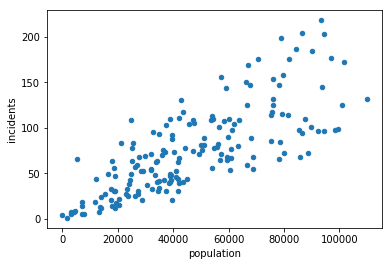

In [39]:
df_zipcode.plot.scatter(x='population', y='incidents')

# CO detector

## Incident duration
For this question, only consider incidents that have information about whether a CO detector was present or not. We are interested in how many times more likely it is that an incident is long when no CO detector is present compared to when a CO detector is present. For events with CO detector and for those without one, compute the proportion of incidents that lasted 20-30, 30-40, 40-50, 50-60, and 60-70 minutes (both interval boundary values included) by dividing the number of incidents in each time interval with the total number of incidents. For each bin, compute the ratio of the 'CO detector absent' frequency to the 'CO detector present' frequency. Perform a linear regression of this ratio to the mid-point of the bins. From this, what is the predicted ratio for events lasting 39 minutes?

TOTAL_INCIDENT_DURATION
The total number of seconds from whe then incident was created to when the incident was closed


In [114]:
df_co = df_data[~df_data.CO_DETECTOR_PRESENT_DESC.isnull()]

In [115]:
df_co['duration_min'] = pd.to_timedelta(pd.to_timedelta(df_co['TOTAL_INCIDENT_DURATION'], unit='s')/np.timedelta64(1, 'm'), unit='m')

/anaconda3/envs/tdi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
df_co[['TOTAL_INCIDENT_DURATION', 'duration_min']].head()

,TOTAL_INCIDENT_DURATION,duration_min
28,1300.0,00:21:40
153,398.0,00:06:38
194,1547.0,00:25:47
249,904.0,00:15:04
449,1871.0,00:31:11


In [133]:
df_co_group = pd.DataFrame(df_co.groupby(['CO_DETECTOR_PRESENT_DESC', pd.TimeGrouper(key='duration_min', freq='10Min')])['duration_min'].size())

/anaconda3/envs/tdi/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [143]:
df_co_binned = pd.DataFrame(index=df_co_group.loc['No'].index)

In [144]:
df_co_binned['no'] = df_co_group.loc['No']/df_co_group.loc['No'].sum()
df_co_binned['yes'] = df_co_group.loc['Yes']/df_co_group.loc['Yes'].sum()


In [145]:
df_co_binned['ratio'] = df_co_binned['no']/df_co_binned['yes']

In [146]:
df_co_binned = df_co_binned.iloc[2:7]

In [147]:
df_co_binned['mid_bin'] = [25, 35, 45, 55, 65]

In [148]:
x = df_co_binned.mid_bin
y = df_co_binned.ratio

a, b, r, p, stderr = stats.linregress(x, y)
print(r)
print(a*39 + b)

0.9936571922014504
1.407776231369608


## likely hood to last longer than 60 min

Calculate the chi-square test statistic for testing whether an incident is more likely to last longer than 60 minutes when CO detector is not present. Again only consider incidents that have information about whether a CO detector was present or not.

In [252]:
df_co['long'] = df_co.duration_min.apply(lambda x: 'long' if x > pd.Timedelta(minutes=60) else 'short')

/anaconda3/envs/tdi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
df_co_time = df_co.groupby(['CO_DETECTOR_PRESENT_DESC', 'long']).size().unstack()

In [256]:
df_co_time

long,long,short
CO_DETECTOR_PRESENT_DESC,,
No,859,4785
Yes,835,23196


In [260]:
statistic, p = stats.chisquare([df_co_time['long']['No']/df_co_time.loc['No'].sum()], [df_co_time['long'].sum()/df_co_time.values.sum()])

In [259]:
df_co_time.values.sum()

29675